# How does it work?

K-mean algorithm splits the data in K clusters.
We start by defining K points at random, this will be the centroids of each split.

Text(0.5, 1.0, 'Dataset with two features')

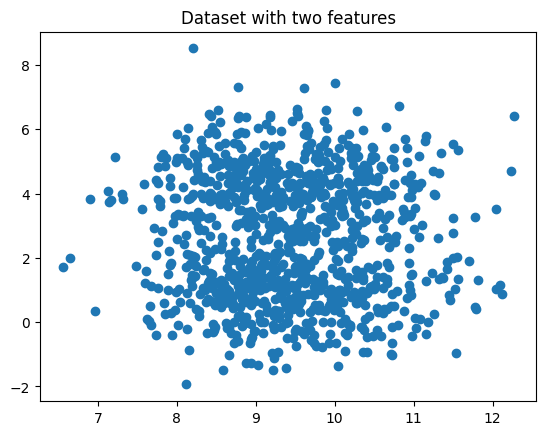

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
## Create sample dataset with sklearn 

n_samples = 1000
n_features = 2
centers = 2     # We will start with 2 classes

data =  make_blobs(n_samples = n_samples, 
                   n_features = n_features, 
                   centers = centers, 
                   random_state= 4)
x_data = data[0][:,0]
y_data = data[0][:,1]
plt.scatter(x_data, y_data)
plt.title('Dataset with two features')

Select random positions of centroids

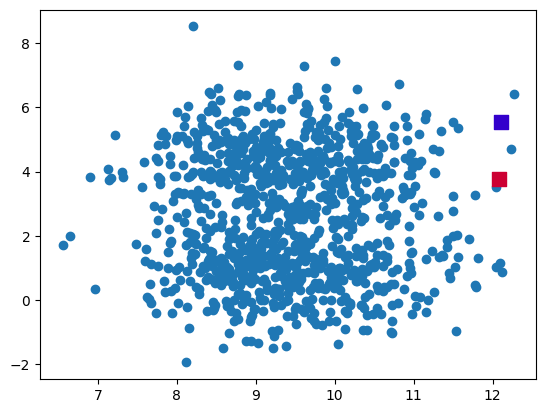

In [2]:
import numpy as np

# Define boundaries of dataset
min_x = data[0][:,0].min()
max_x = data[0][:,0].max()
min_y = data[0][:, 1].min()
max_y = data[0][:,1].max()

# Random positions of 2 centroidsA
np.random.seed(4)
centroid_1 = [(max_x-min_x)*np.random.random()+min_x, (max_y-min_y)*np.random.random()+min_y]
centroid_2 = [(max_x-min_x)*np.random.random()+min_x, (max_y-min_y)*np.random.random()+min_y]

# Plot the positions as squares
plt.scatter(x_data, y_data)
plt.scatter(centroid_1[0], centroid_1[1], 100, marker = "s", color = (0.8, 0, 0.2))
plt.scatter(centroid_2[0], centroid_2[1], 100, marker = "s", color = (0.2, 0, 0.8))

Then we assign the classes closers to the centroids

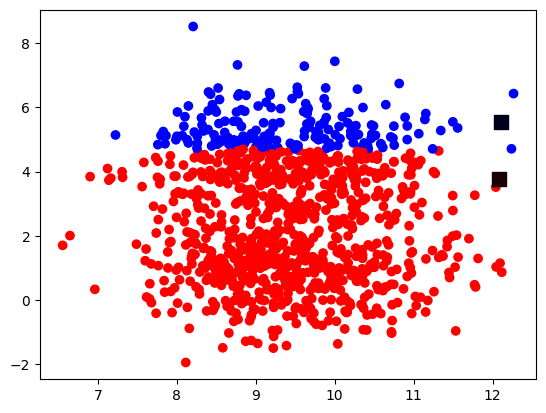

In [3]:
# We calculate the distances from each point to the centroids 
distance_1 = np.sqrt((x_data-centroid_1[0])**2 + (y_data-centroid_1[1])**2)
distance_2 = np.sqrt((x_data-centroid_2[0])**2 + (y_data-centroid_2[1])**2)

# We substract them to compare values and assign classes
# positive -> class 2
# negative -> class 1

distance_compare = distance_1 - distance_2
classes = np.where(distance_compare < 0, 0, 1)
colors = np.where(classes == 0, 'red', 'blue')

# Plot the resulting classes
plt.scatter(x_data, y_data, c = colors)
plt.scatter(centroid_1[0], centroid_1[1], 100, marker = "s", color = (0.1, 0, 0))
plt.scatter(centroid_2[0], centroid_2[1], 100, marker = "s", color = (0, 0, 0.1))

Then we define the new centroids as the mean of the splitted classes, and iterate until convergence

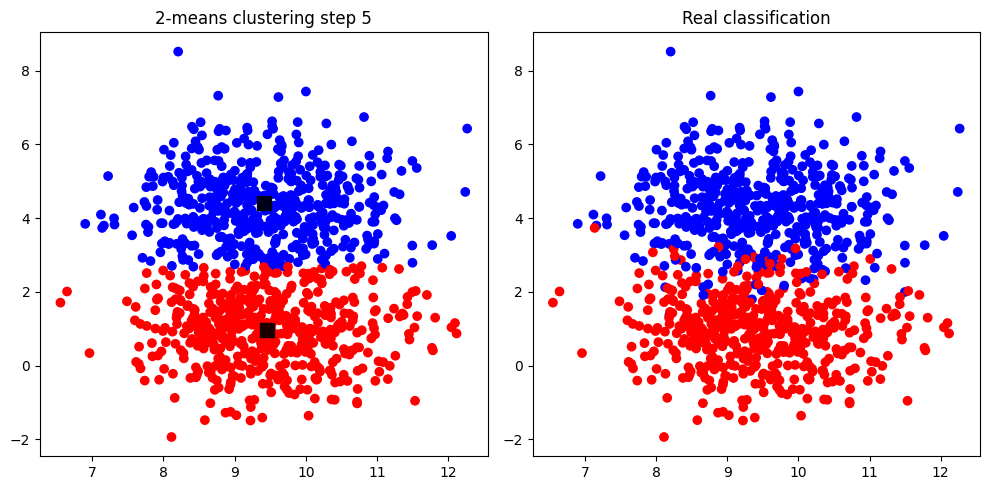

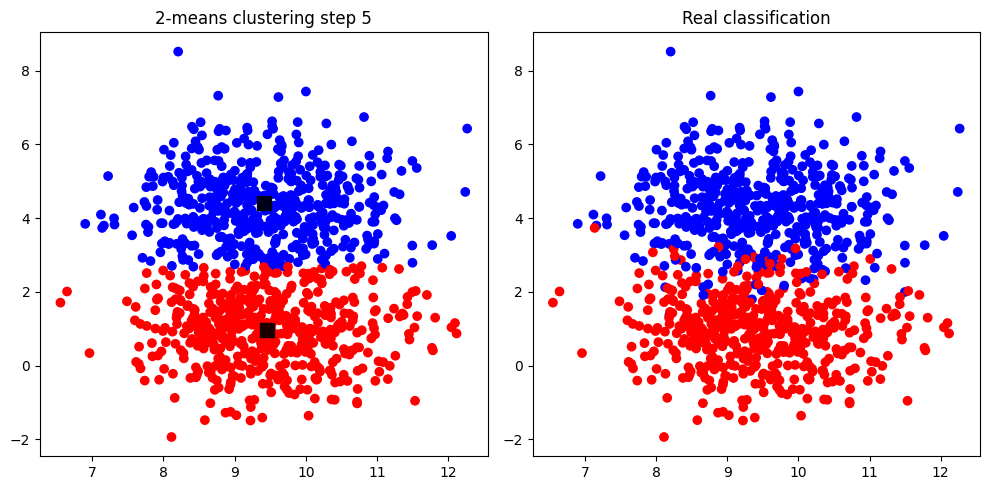

In [4]:
import time
from IPython.display import clear_output, display
#Figure to actualize in each step
plt.ion()  # Turn on interactive mode
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
scatter_kmeans = ax1.scatter(x_data, y_data, c = colors)
class_1 = ax1.scatter(centroid_1[0], centroid_1[1], 100, marker = "s", color = (0.1, 0, 0))
class_2 = ax1.scatter(centroid_2[0], centroid_2[1], 100, marker = "s", color = (0, 0, 0.1))
ax1.set_title('2-means clustering step 0')

# Get labels of real classification 
real_labels = data[1]
real_colors = np.where(real_labels == 0, 'red', 'blue')

scatter_real = ax2.scatter(x_data, y_data, c = real_colors)
ax2.set_title('Real classification')

plt.tight_layout()

# Define initial diff and treshold
diff_1 = 1
diff_2 = 1
treshold = 0.1

step = 1
while diff_1 > treshold or diff_2 > treshold:
    # Obtain the centers of each class
    mean_x1 = x_data[classes == 0].mean()
    mean_y1 = y_data[classes == 0].mean()
    mean_x2 = x_data[classes == 1].mean()
    mean_y2 = y_data[classes == 1].mean()

    # Define this as the centroids
    new_centroid_1 = np.array([mean_x1, mean_y1])
    new_centroid_2 = np.array([mean_x2, mean_y2])

    # Calculate the distances from each point to the centroids 
    distance_1 = np.sqrt((x_data-new_centroid_1[0])**2 + (y_data-new_centroid_1[1])**2)
    distance_2 = np.sqrt((x_data-new_centroid_2[0])**2 + (y_data-new_centroid_2[1])**2)

    # We substract them to compare values and assign classes
    # positive -> class 2
    # negative -> class 1

    distance_compare = distance_1 - distance_2
    classes = np.where(distance_compare < 0, 0, 1)
    colors = np.where(classes == 0, 'red', 'blue')

    # Compare previous centroids with new ones
    diff_1 = np.linalg.norm(centroid_1 - new_centroid_1)
    diff_2 = np.linalg.norm(centroid_2 - new_centroid_2)

    # Assign the new centroids as the previous one for next step
    centroid_1 = new_centroid_1
    centroid_2 = new_centroid_2

    # Plot the resulting classes
    scatter_kmeans.set_color(colors)
    class_1.set_offsets(np.column_stack((centroid_1[0], centroid_1[1])))
    class_2.set_offsets(np.column_stack((centroid_2[0], centroid_2[1])))
    ax1.set_title(f"2-means clustering step {step}")
    
    step += 1
    # Clear previous output and display updated plot
    clear_output(wait=True)

    display(fig)
    time.sleep(2)


## More than 3 clusters
### (Code here is for "k" clusters just change the n_classes variable)

Text(0.5, 1.0, 'Dataset with two features')

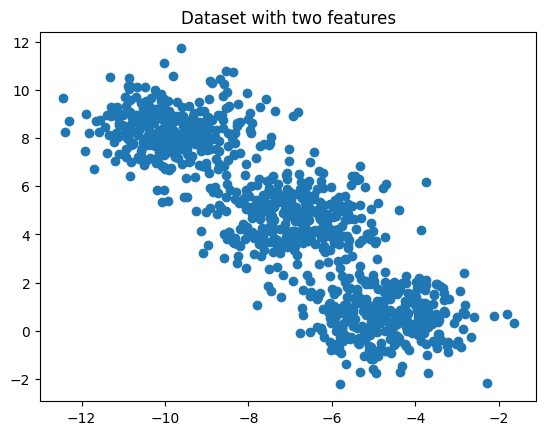

In [5]:
## Create sample dataset with sklearn 

n_samples = 1000
n_features = 2
n_classes = 3

data =  make_blobs(n_samples = n_samples, 
                   n_features = n_features, 
                   centers = n_classes,
                   random_state = 12)

plt.scatter(data[0][:, 0], data[0][:, 1])
plt.title('Dataset with two features')

Let's create the functions to use the k-means algorithm with one function

In [6]:
import numpy as np
import time
from IPython.display import clear_output, display

# Let's create a general (k-clusters) process for updating
def update_centroids(x_data, y_data, n_classes, classes):

    new_centroids_x= []
    new_centroids_y= []

    for ii in range(n_classes):
        mean_x = x_data[classes == ii].mean()
        mean_y = y_data[classes == ii].mean()
        new_centroids_x.append(mean_x)
        new_centroids_y.append(mean_y)
    return new_centroids_x, new_centroids_y


In [7]:
# A function to define the classes with the nearest centroid

def define_classes(x_data, y_data, n_classes, centroids_x, centroids_y):
    # We calculate the distances from each point to the centroids 
    distance = np.zeros((n_classes, len(x_data)))
    for ii in range(n_classes):
        distance[ii, :] = np.sqrt((x_data-centroids_x[ii])**2 + (y_data-centroids_y[ii])**2)

    # Minimum distances
    classes = np.argmin(distance, axis = 0)
    return classes

In [8]:
# A function that initializes random centorids inside the domain values
import numpy as np

def rand_centorids(data, n_classes):
    # Define boundaries of dataset
    min_x = data[:, 0].min()
    max_x = data[:, 0].max()
    min_y = data[:, 1].min()
    max_y = data[:, 1].max()

    centroids_x = (max_x - min_x)*np.random.random(n_classes) + min_x
    centroids_y = (max_y - min_y)*np.random.random(n_classes) + min_y

    centroids = np.array([[centroids_x[ii], centroids_y[ii]] for ii in range(n_classes)])

    return centroids

In [9]:
# Run the k-mean algorithm and plot how the centroids update until they converge

def kmeans_algo(data, centroids, n_classes, treshold):
    # Get x and y of data
    x_data = data[0][:, 0]
    y_data = data[0][:, 1]

    # Get centroid coordinates in x and y
    centroids_x = centroids[:, 0]
    centroids_y = centroids[:, 1]

    classes = define_classes(x_data, y_data, n_classes, centroids_x, centroids_y)

    #Figure to actualize in each step
    plt.ion()  # Turn on interactive mode
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    scatter_kmeans = ax1.scatter(x_data, y_data, c = classes)
    centroids_plot = ax1.scatter(centroids_x, centroids_y, 100, marker = "s", color = (0, 0, 0))
        
    ax1.set_title(f"{n_classes}-means clustering step 0")

    # Get labels of real classification 
    real_labels = data[1]

    scatter_real = ax2.scatter(x_data, y_data, c = real_labels)
    ax2.set_title('Real classification')

    plt.tight_layout()

    # Define initial diff and treshold
    diff = [2, 2]

    step = 1
    while min(diff) > treshold:

        new_centroids_x, new_centroids_y = update_centroids(x_data, y_data, n_classes, classes)

        classes = define_classes(x_data, y_data, n_classes, new_centroids_x, new_centroids_y)

        # Compare previous centroids with new ones
        diff = []
        for ii in range(n_classes):
            diff.append(np.sqrt((new_centroids_x[ii]-centroids_x[ii])**2 + (new_centroids_y[ii]-centroids_y[ii])**2))

        # Assign the new centroids as the previous one for next step
        centroids_x= new_centroids_x
        centroids_y= new_centroids_y

        # Plot the resulting classes
        scatter_kmeans.set_array(classes)
        centroids_plot.set_offsets(np.column_stack((centroids_x, centroids_y)))
        ax1.set_title(f"{n_classes}-means clustering step {step}")
        
        step += 1
        # Clear previous output and display updated plot
        clear_output(wait=True)

        display(fig)
        time.sleep(2)

    return classes, centroids_x, centroids_y

The colors might not be the same, but for the unsupervised models (in this case K-means) we are just creating groups, their color doesn't has a meaning rather than they belong to the same group.

# K++ (Smart initialization of clusters)

Sometimes the initial guess of the centers might be inefficient. One way to improve this is by assigning the next cluster as one of the datapoints with probability $D(x_{i}^{2})/\sum_{i = 1}^{n} D(x_{i})^{2}$ where $D(x_{i})$ is the distance from data point $i$ to the closest centroid.

This way we have more chances of choosing centroids that are appart from each other getting a better initialization

In [40]:
# Let's create a function that calculates the probability for each point

def probability_distribution(data, centroids):
    
    distances = np.zeros((len(centroids), n_samples))
    for ii in range(len(centroids)):
        distances[ii, :] = np.linalg.norm(data-centroids[ii], axis = 1)
    distances = distances.min(axis = 0)
    probs = distances**2/(np.linalg.norm(distances)**2)
    return probs

def ansatz_centroids(n_features, n_classes, data):
    random_datapos = np.random.choice(range(len(data)))
    centroids = data[random_datapos]
    centroids = np.expand_dims(centroids, axis=0)
    for ii in range(n_classes-1):
        probs = probability_distribution(data, centroids)
        pos_array = np.random.choice(range(len(data)), p = probs)
        
        new_centroid = data[pos_array]
        new_centroid = np.expand_dims(new_centroid, axis=0)
        centroids = np.concatenate((centroids, new_centroid), axis=0)
    return centroids
    # Plot the centroids and how the clustering is made initially
    # We calculate the distances from each point to the centroids 
centroids = ansatz_centroids(n_features, n_classes, data[0])

# Try this with the same dataset as before

classes, centroids_x, centroids_y = kmeans_algo(data, centroids, n_classes, 0.05)

TypeError: unsupported operand type(s) for -: 'list' and 'int'

With K++ algorithm we could get less steps than a plain k-means algorithm. But the really important part here is that with k++ we have more chances of having convergence.

# How many clusters???
This can be defined previously depending on what we need in specific cases.

* If we want a clothing design in 10 different sizes to cover most people (K = 10)
* Clustering similar jobs on 4 CPU cores (K = 4)
* A navigation interface for browsing scientific papers with 20 disciplines (K = 20)

Sometimes we don't know what we need, we can use some metrics to evaluate the clustering performance
* Inertia: $\sum_{i=1}^{n}(x_{i}-C_{k})^2$
* Distortion: ($\frac{1}{n}\sum_{i=1}^{n}(x_{i}-C_{k})^2$)

Usually this values decrease as we increase K, we usually pick the k with the elbow method, i.e., an inflection point.

In [41]:
# Let's create functions to calculate inertia and distortion

def inertia_fun(data, centroids, n_classes, classes):
    inertia = 0
    for ii in range(n_classes):
        inertia += (np.linalg.norm(data[classes == ii] - centroids[ii], axis = 1)**2).sum()
    return inertia

def distortion(data, centroids, classes):
    return inertia_fun(data, centroids, classes)/len(data)



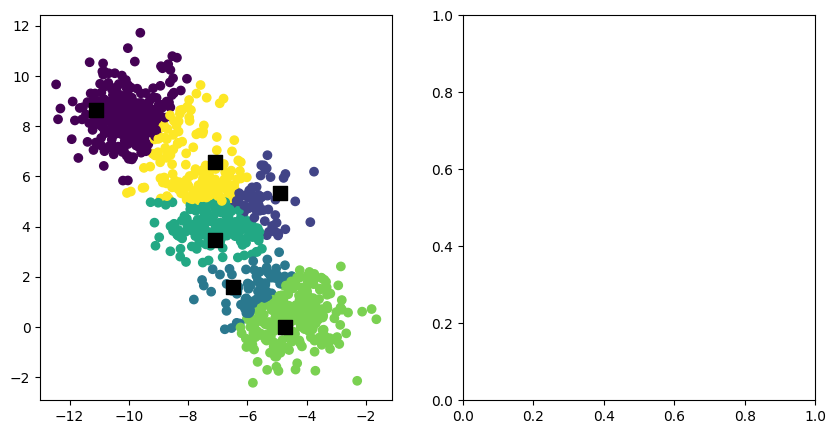

In [44]:
k = 6
centroids = ansatz_centroids(n_features, k, data[0])
x_data = data[0][:, 0]
y_data = data[0][:, 1]

centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

classes = define_classes(x_data, y_data, k, centroids_x, centroids_y)

#Figure to actualize in each step
plt.ion()  # Turn on interactive mode
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
scatter_kmeans = ax1.scatter(x_data, y_data, c = classes)
centroids_plot = ax1.scatter(centroids_x, centroids_y, 100, marker = "s", color = (0, 0, 0))

For the elbow method using inertia or distortion is the same since we will just work with scale data.

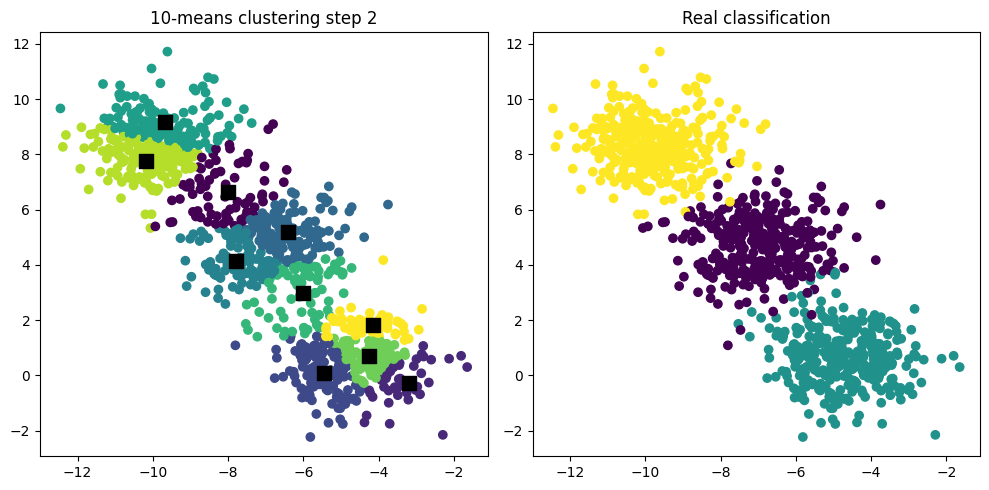

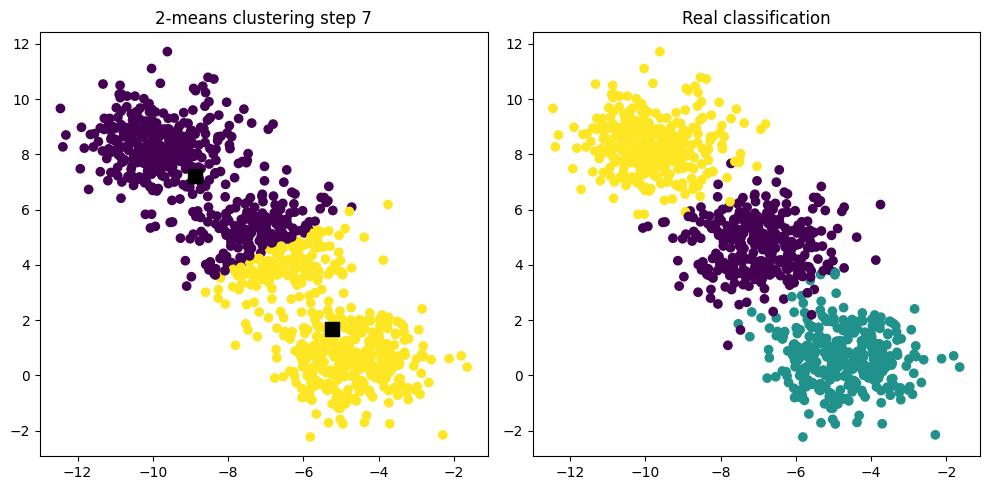

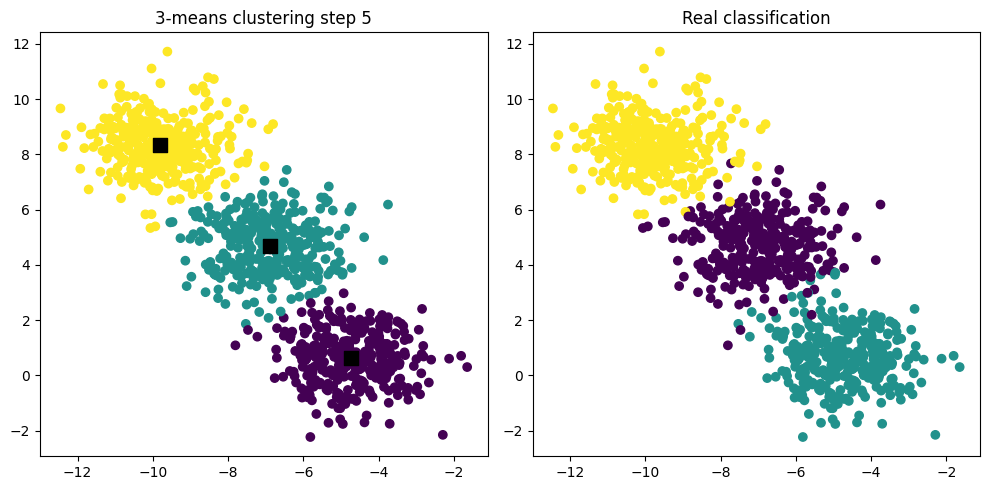

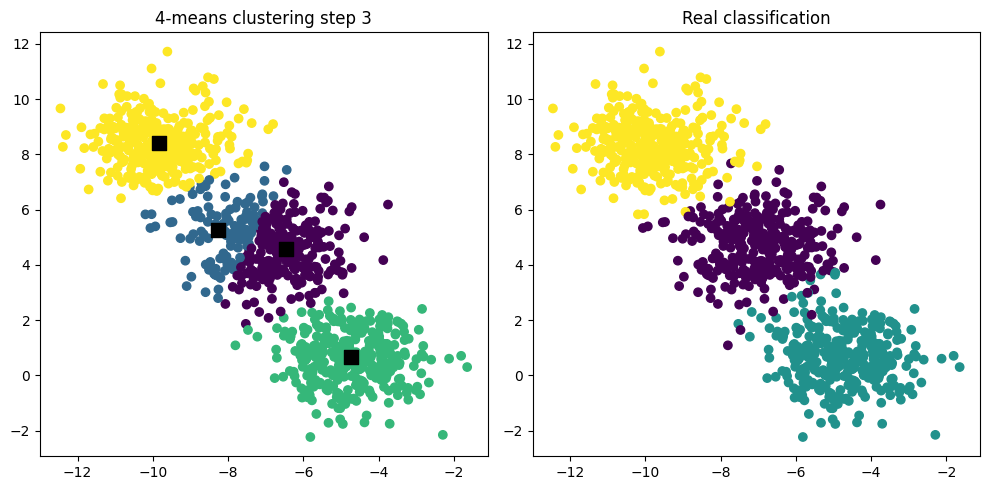

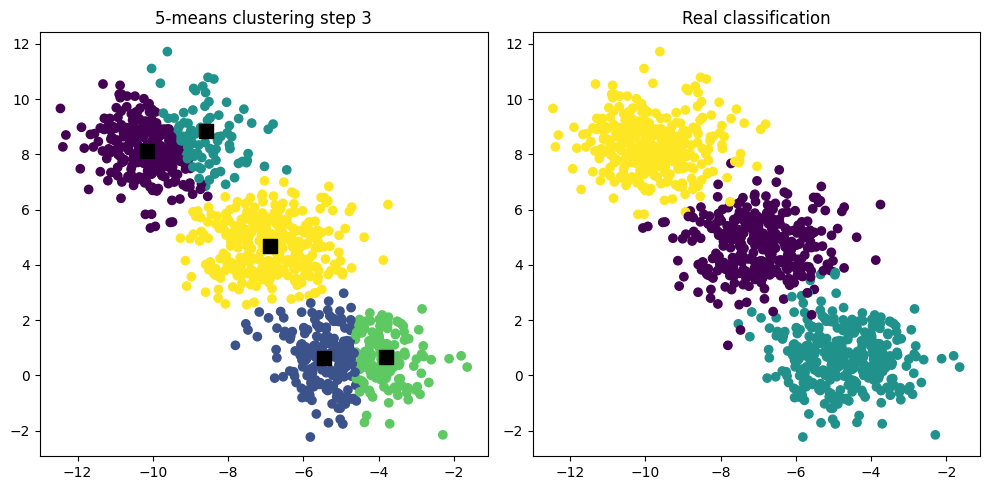

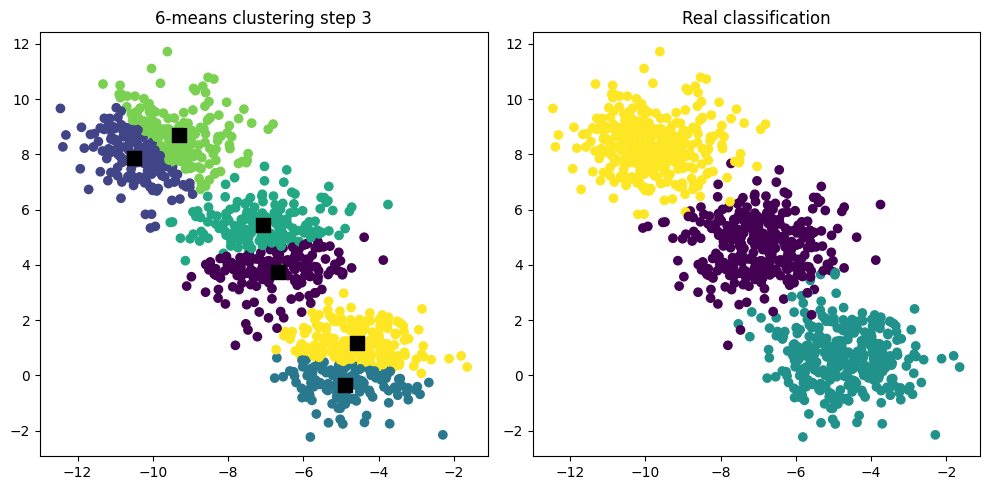

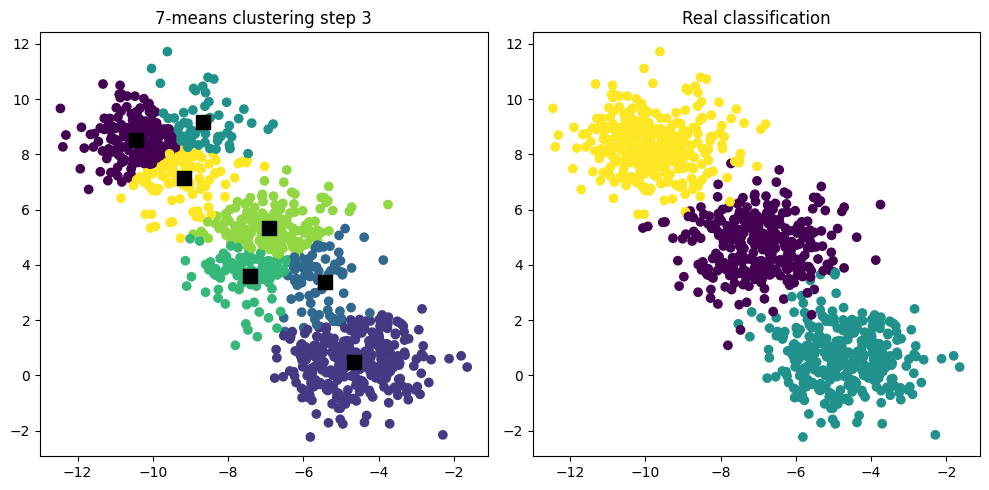

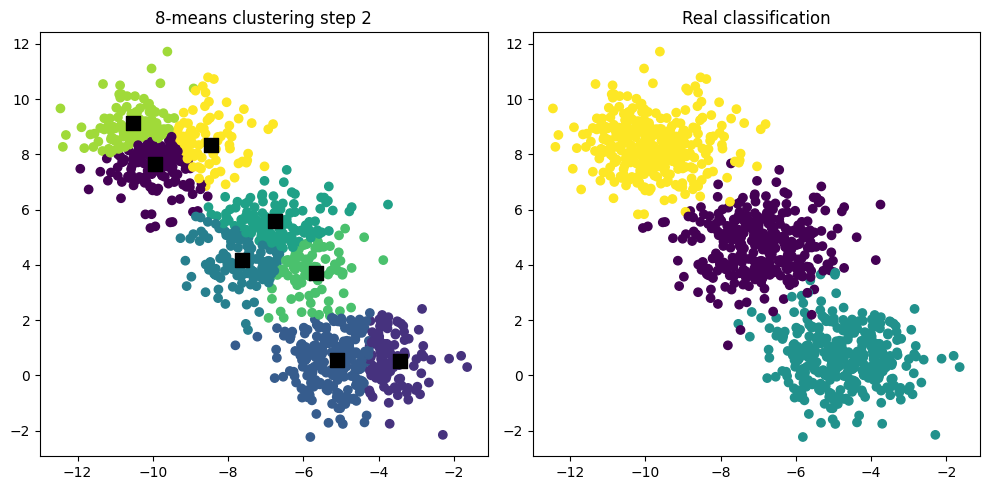

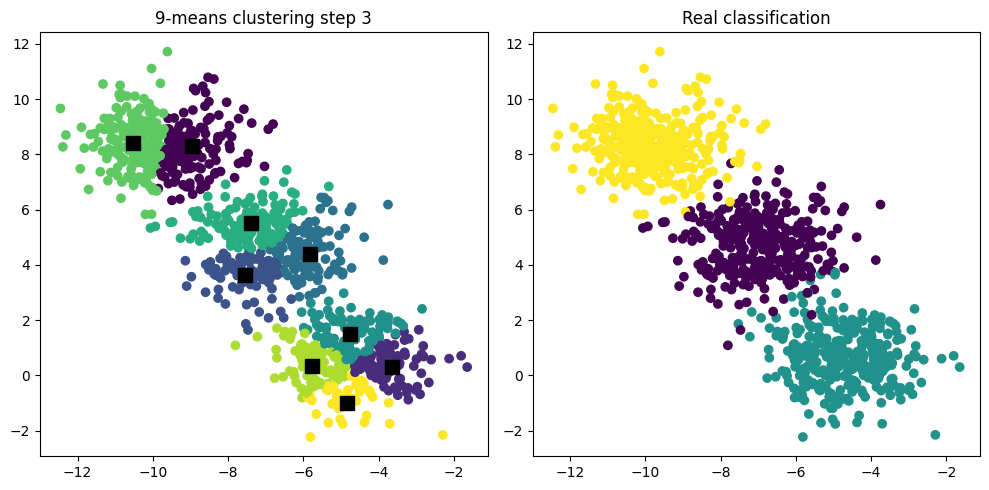

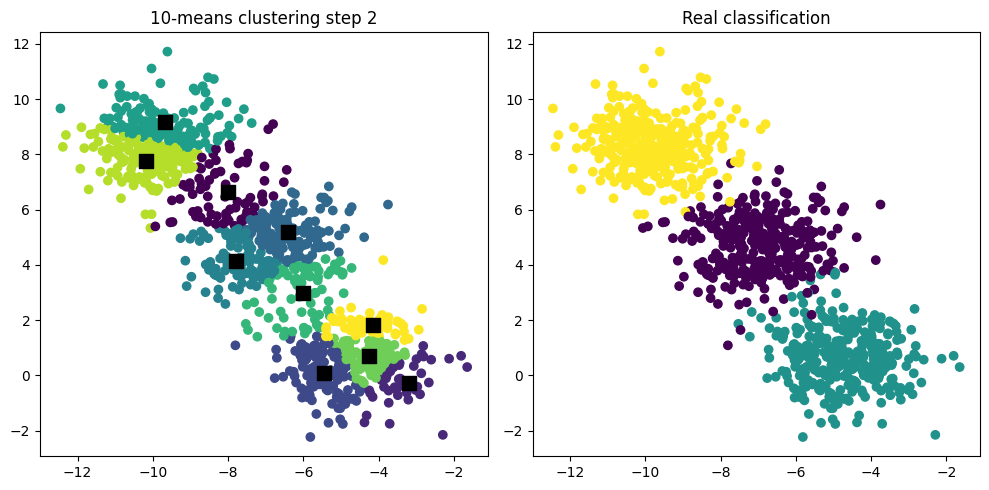

In [45]:
n_classes = [2, 3, 4, 5, 6, 7, 8, 9, 10]

inertia = []

for ii in n_classes:
    centroids = ansatz_centroids(n_features, ii, data[0])
    classes, centroids_x, centroids_y = kmeans_algo(data, centroids, ii, 0.05)
    
    centroids = [[centroids_x[ii], centroids_y[ii]] for ii in range(len(centroids_x))]

    inertia.append(inertia_fun(data[0], centroids, ii, classes))

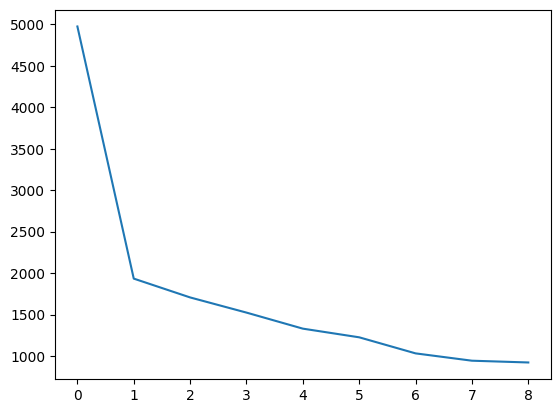

In [46]:
plt.plot(inertia)